<a id='top'></a>

# CSCI3022 F21
# Homework 2: Visualizing and Processing Data
***

**Name**: Caleb Starkey

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 13 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline



[Back to top](#top)
<a/ id='p1'></a>

## (20 pts) Problem 1: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**Typset your solution here:** 1+n floating point operations are required to compute the mean. (n additions and 1 division)

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Typset your solution here:** n+n! floating point operations are requried to compute and recompute the mean(n divisions and n! additions)


We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after this problem, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#Solution:
def my_sample_mean(array):
    return(round(np.sum(array)/np.size(array),3))

def my_sample_var(array):
    mean = my_sample_mean(array)
    array = array-mean
    array = array**2
    return(round(np.sum(array)/(np.size(array)-1),3))
    


**Part D**: Use your functions from Part C to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42,12,1]`

In [3]:
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42,12,1]
print("The sample mean of bus = {}".format(my_sample_mean(bus)))
print("The sample variance of bus = {}".format(my_sample_var(bus)))


The sample mean of bus = 49.286
The sample variance of bus = 6488.681


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    new_mean = prev_mean + ((xn-prev_mean)/n)
    return(new_mean)
buffbus_bad_means = np.zeros(np.size(bus))
temp = buffbus_bad_means[0] = bus[0] 
for i in range (1, np.size(bus)):
    temp = update_mean(temp, bus[i], i+1)
    buffbus_bad_means[i] = temp
print("The 12 running mean estimates of the bus array are = {}".format(buffbus_bad_means))

The 12 running mean estimates of the bus array are = [312.         158.         108.66666667  81.5         69.6
  64.5         66.85714286  60.875       55.          55.5
  57.72727273  56.41666667  53.          49.28571429]


In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in part E?  Is this truly better than the uninformed approach from part B?

**Typset your solution here:** the floating point operations from the code in part E are = $(n-1)^3$ where n is the length of the array. Thus $13^3$ or $2197$ operations were spent computing the means in part E. This is better than the uniformed apporach of part B in which $13+13!$ or $6227020813$ operations would be spent to compute the running mean     


**Part G:**
A similar result to the formula preceding part C holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **E** to perform running calculations of *both* variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.

**Typset your solution here:** To do this you would have to input prev_mean, xn, n and the array[:n]. You could still calculate new mean with a single line like my above function, but for variance you could do a few things. We need both the sum of $x_{i}^2$ and the sum of $(x_i)$ squared. For the sum of $(x_i)$ squared you could use numpy to aquire the sum and square that, to get the other sum you would need to use a for loop or map function in which you square x and then total all the values of $x_{i}^2$ from there you could return new_mean as well as a new_varaince where new_variance is $= (n(x_{i}^2) sum - (x_i sum)^2))/(n(n-1))$ 


<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



## (25 pts) Problem 2: Data (Grouping and Plotting)

The US Census Bureau is one of the largest data gathering organizations in the year.  They often have to analyze data involving the entire nation and describe it according to a variety of factors, including grouping by location (state, city, neighorhood), demographic factors, time, and more.  For this problem we have access to 10 years of state-wide reported unemployment data: for each of the reporting governments, we have 120 months of unemployment percentages.

Our goal is to explore this data and visualize it.

In [6]:
df=pd.read_csv('./data/employment.csv', encoding='UTF-8')
dfstates=pd.read_csv('./data/stategeocodes.csv', encoding='UTF-8')


**Part A:**  Load in the data above from both `employment.csv` and `stategeocodes.csv` and make sure you understand the data's shape and form.  For each file, check out `pd.dtypes` then print out `pd.shape` and `pd.head`.  Is each field of the correct data type?  Do we have the expected number of rows for tracking all 50 states?


In [7]:
print("Employment data types\n {}\n".format(df.dtypes))
print("States data types\n {}\n".format(dfstates.dtypes))
print("employment shape = {}\n".format(df.shape))
print("states shape = {}\n".format(dfstates.shape))
print("Employment data\n {}".format(df.head))
print("States data\n {}".format(dfstates.head))

Employment data types
 Series ID      int64
11-Jan       float64
11-Feb       float64
11-Mar       float64
11-Apr       float64
              ...   
20-Aug       float64
20-Sep       float64
20-Oct       float64
20-Nov       float64
20-Dec       float64
Length: 121, dtype: object

States data types
 Region           int64
Division         int64
State (FIPS)     int64
Name            object
dtype: object

employment shape = (51, 121)

states shape = (64, 4)

Employment data
 <bound method NDFrame.head of     Series ID  11-Jan  11-Feb  11-Mar  11-Apr  11-May  11-Jun  11-Jul  11-Aug  \
0           1    10.7    10.3     9.8     9.2     9.3    10.3    10.1     9.8   
1           2     9.0     8.9     8.6     8.0     7.6     7.8     7.0     6.7   
2           4    10.1     9.6     9.3     9.1     8.9    10.4    10.2     9.8   
3           5     8.9     8.7     8.0     7.5     7.8     8.3     8.3     7.9   
4           6    12.7    12.4    12.3    11.7    11.5    12.2    12.4    12.1   
5    

The data types look correct however we have more rows than needed for tracking all 50 states in the dfstates data.

**Part B:**  The official US census divides the US into 4 super-regions, [shown here](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf).  Add a column for `Region` and assign all of the regions to their correct region.  

Unfortunately, the data wasn't given with these regions, so we have to add them in using the second data file.  We also only have odd codes for each of the states, instead of their names!  Add both `"State"` and `"Region:` columns to the employment data frame with the actual state names and their region numbers or names. You can match IDs from `State (FIPS)` in the `stategeocodes.csv` to the `Series ID` from `employment.csv`.


In [8]:
states = []
regions = []
for x in df["Series ID"]:
    states.append(dfstates.loc[dfstates["State (FIPS)"]==x, "Name"].iloc[0])
    regions.append(dfstates.loc[dfstates["State (FIPS)"]==x, "Region"].iloc[0])
df["State"] = states
df["Region:"] = regions

**Part C:**

As a sanity check, loop over all the unique regions you've created and print out how many rows of your data frame are in that region.  You should find:

1) 9 in the Northeast

2) 12 in the Midwest

3) 17 in the South

4) 13 in the West

In [9]:

print(" {} are in the Northeast".format((df["Region:"] == 1).sum()))
print(" {} are in the Midwest".format((df["Region:"] == 2).sum()))
print(" {} are in the South".format((df["Region:"] == 3).sum()))
print(" {} are in the West".format((df["Region:"] == 4).sum()))

 9 are in the Northeast
 12 are in the Midwest
 17 are in the South
 13 are in the West


**Part D:** Create a histogram of the entire data frame.  Describe it's general shape (skewness or symmetry) and whether or not it has any outliers.

(Check out `np.reshape` for a nice way to turn a large matrix/array into something 1-dimensional, for easier plotting!)

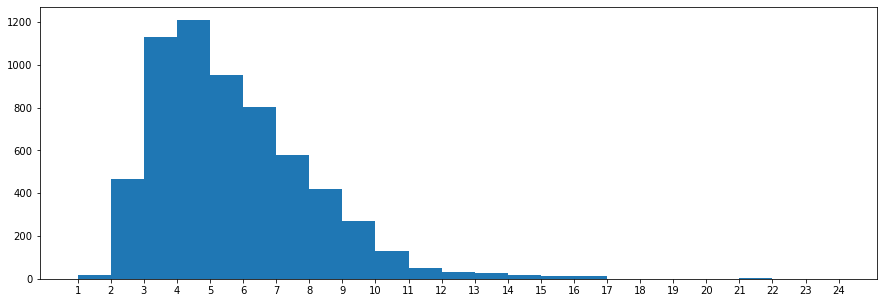

In [10]:
dfplot = df.drop(["Series ID","State","Region:"],axis=1)
plotArray = dfplot.to_numpy()
plotArray = plotArray.flatten()
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
counts, bins, bars = plt.hist(plotArray, bins = range(1,25))
plt.xticks(bins)
plt.show()

The data is unimodal and skewed to the left with outliers in the bin relating to values between 21 and 22 

**Part E:** Create a single figure with a series of box plots (4 side-by-side boxes) of the employment data grouped by each region.

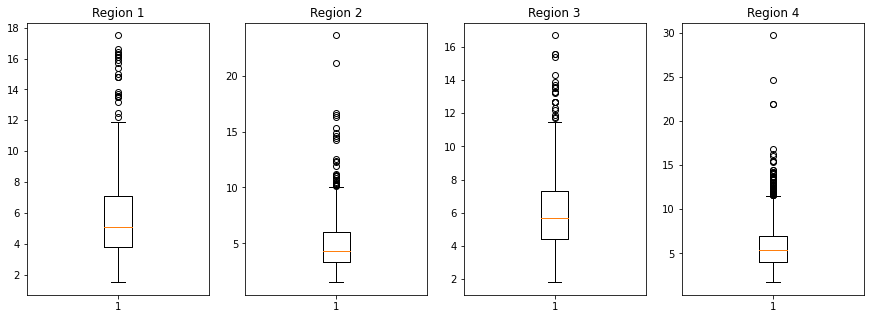

In [11]:
dfreg1 = df.loc[df["Region:"] == 1]
dfreg2 = df.loc[df["Region:"] == 2]
dfreg3 = df.loc[df["Region:"] == 3]
dfreg4 = df.loc[df["Region:"] == 4]
dfplot1 = dfreg1.drop(["Series ID","State","Region:"],axis=1)
dfplot2 = dfreg2.drop(["Series ID","State","Region:"],axis=1)
dfplot3 = dfreg3.drop(["Series ID","State","Region:"],axis=1)
dfplot4 = dfreg4.drop(["Series ID","State","Region:"],axis=1)

plotArray1 = dfplot1.to_numpy()
plotArray1 = plotArray1.flatten()
plotArray2 = dfplot2.to_numpy()
plotArray2 = plotArray2.flatten()
plotArray3 = dfplot3.to_numpy()
plotArray3 = plotArray3.flatten()
plotArray4 = dfplot4.to_numpy()
plotArray4 = plotArray4.flatten()

fig,((ax0), (ax1) , (ax2), (ax3)) = plt.subplots(nrows=1, ncols=4)
fig.set_figwidth(15)
fig.set_figheight(5)
ax0.boxplot(plotArray1)
ax1.boxplot(plotArray2)
ax2.boxplot(plotArray3)
ax3.boxplot(plotArray4)

ax0.set(title='Region 1')
ax1.set(title='Region 2')
ax2.set(title='Region 3')
ax3.set(title='Region 4')

plt.show()

**Part F:** Create a new data frame with 12 columns that groups all of the data according to month of the year.  You can combine all the locations into a single column for each month.  

(*Hint*: Every 12th data column should be from the same month.)

Then create a single figure with a series of box plots (12 side-by-side boxes) of the employment data grouped by each month.


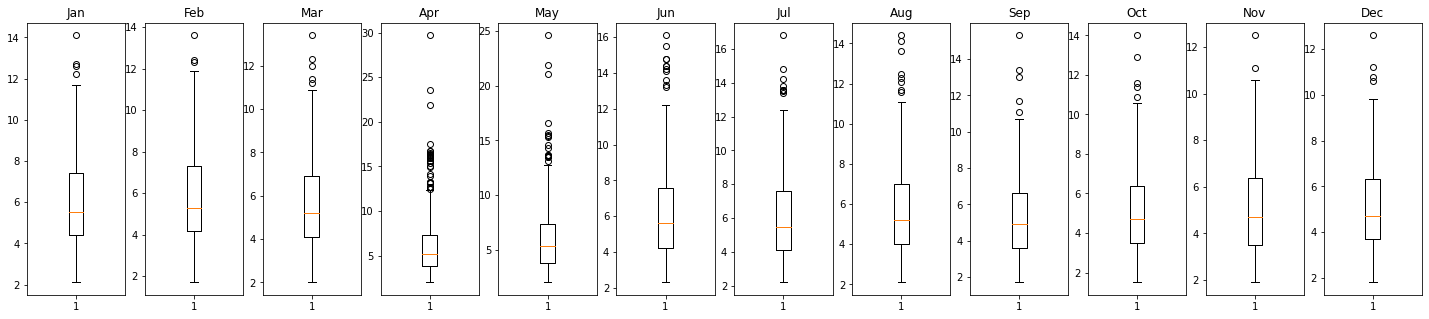

In [12]:
fig,((ax0), (ax1) , (ax2), (ax3), (ax4), (ax5), (ax6), (ax7), (ax8), (ax9), (ax10), (ax11)) = plt.subplots(nrows=1, ncols=12)
dfplot = df.drop(["Series ID","State","Region:"],axis=1)
plotJan = (dfplot.iloc[:,0::12].to_numpy()).flatten()
plotFeb = (dfplot.iloc[:,1::12].to_numpy()).flatten()
plotMar = (dfplot.iloc[:,2::12].to_numpy()).flatten()
plotApr = (dfplot.iloc[:,3::12].to_numpy()).flatten()
plotMay = (dfplot.iloc[:,4::12].to_numpy()).flatten()
plotJun = (dfplot.iloc[:,5::12].to_numpy()).flatten()
plotJul = (dfplot.iloc[:,6::12].to_numpy()).flatten()
plotAug = (dfplot.iloc[:,7::12].to_numpy()).flatten()
plotSep = (dfplot.iloc[:,8::12].to_numpy()).flatten()
plotOct = (dfplot.iloc[:,9::12].to_numpy()).flatten()
plotNov = (dfplot.iloc[:,10::12].to_numpy()).flatten()
plotDec = (dfplot.iloc[:,11::12].to_numpy()).flatten()

ax0.boxplot(plotJan)
ax1.boxplot(plotFeb)
ax2.boxplot(plotMar)
ax3.boxplot(plotApr)
ax4.boxplot(plotMay)
ax5.boxplot(plotJun)
ax6.boxplot(plotJul)
ax7.boxplot(plotAug)
ax8.boxplot(plotSep)
ax9.boxplot(plotOct)
ax10.boxplot(plotNov)
ax11.boxplot(plotDec)

ax0.set(title='Jan')
ax1.set(title='Feb')
ax2.set(title='Mar')
ax3.set(title='Apr')
ax4.set(title='May')
ax5.set(title='Jun')
ax6.set(title='Jul')
ax7.set(title='Aug')
ax8.set(title='Sep')
ax9.set(title='Oct')
ax10.set(title='Nov')
ax11.set(title='Dec')

fig.set_figwidth(25)
fig.set_figheight(5)
plt.show()

**Part G:** Discuss the following:

1) Does there appear to be larger differences between different *regions* or between different *months*?  Explain fully.  Speculate as to *why* one factor might matter more than the other.

2) Are there any downsides to these kinds of groupings?  Can you think of anything that might make these types of comparisons more useful?


**Typset your solution here:** 
1)Months seem to have a very consitant mean around 5% but a great variance in outliers, especially in May and April, who probably aquired the outliers from the initial burst of covid shutdowns in the spring of 2020. Region 1, Region 3, and Region 4 have similar data, although the appearance of Region 4s plot is affected by an outlier around %30. Region 2 happens to have a smaller mean which may be due to the types of jobs that were more heavily affected by Covid. Things like transportation and manufactoring of goods. For this type of data I believe regions to be more important as it shows some significant differenes in mean for Region 2 from the other regions. Something not seen in the differences between months. 

2) Regions is a good grouping as there are often differences in census data based on area. Perhaps going further and differentiating by state could show some interesting data to see which states were hit the hardest by covid/have taken the longest to recover once the 2021 census is finished, or which states generally have the highest unemployment rates. If you graphed states by month you could also potentially view mass migration of homeless individuals from warmer places in the winter to cooler states in the summer.